In [1]:
#Photography Locations Project

In [2]:
#Open the file
import pandas as pd
df = pd.read_csv('PhotoLocationData.csv')
df.head() #first 5 records

,date,location
0,1/4/2021,westerly
1,1/20/2021,NapaTree Beach
2,1/4/2021,NapaTree Beach
3,1/13/2021,NapaTree Beach
4,1/7/2021,TrustomPond Preserve


In [3]:
#remove nans
df = df.dropna()
df.dtypes
df.head()

,date,location
0,1/4/2021,westerly
1,1/20/2021,NapaTree Beach
2,1/4/2021,NapaTree Beach
3,1/13/2021,NapaTree Beach
4,1/7/2021,TrustomPond Preserve


In [4]:
#all the dates are not in the same format
#since data is all from 2021
#pick month and day
#change jan,april,may,june to digits in the month

date_dict = {'Jan-21' : '1/1/2021', 'Apr-21' : '4/1/2021', 'May-21' : '5/1/2021', 'Jun-21' : '6/1/2021'}
  
# Print the dictionary
print(date_dict)
  
# Remap the values of the dataframe
df = df.replace({"date": date_dict})
df

{'Jan-21': '1/1/2021', 'Apr-21': '4/1/2021', 'May-21': '5/1/2021', 'Jun-21': '6/1/2021'}


,date,location
0,1/4/2021,westerly
1,1/20/2021,NapaTree Beach
2,1/4/2021,NapaTree Beach
3,1/13/2021,NapaTree Beach
4,1/7/2021,TrustomPond Preserve
5,1/17/2021,NapaTree Beach
6,1/17/2021,harkness State Beach
7,1/31/2021,NapaTree Beach
8,1/18/2021,Misquamicut Beach
9,1/1/2021,NapaTree Beach


In [5]:
#number of locations visited permdate
df.groupby(['date'])['location'].count()

date
1/1/2021     1
1/13/2021    1
1/17/2021    2
1/18/2021    1
1/20/2021    1
1/31/2021    1
1/4/2021     2
1/7/2021     1
2/15/2021    3
2/17/2021    1
3/10/2021    2
3/14/2021    1
3/20/2021    2
3/21/2021    1
3/4/2021     1
3/8/2021     1
3/9/2021     1
4/1/2021     1
4/11/2021    1
4/12/2021    1
4/13/2021    1
4/15/2021    1
4/20/2021    1
4/27/2021    1
4/4/2021     1
4/6/2021     1
4/7/2021     1
5/1/2021     1
5/11/2021    1
5/14/2021    1
5/15/2021    2
5/26/2021    1
5/8/2021     1
5/9/2021     1
6/1/2021     1
6/10/2021    1
6/25/2021    1
6/26/2021    1
6/4/2021     2
6/6/2021     1
7/1/2021     1
7/11/2021    1
7/8/2021     1
Name: location, dtype: int64

In [6]:
#change date to date time and month day,then group by month and find most visited spot
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2021-01-04
1   2021-01-20
2   2021-01-04
3   2021-01-13
4   2021-01-07
Name: date, dtype: datetime64[ns]

In [7]:
#change to month and year only
df['month_year'] = df['date'].dt.to_period('M')
df['month_year'].head() #first 5 rows

0    2021-01
1    2021-01
2    2021-01
3    2021-01
4    2021-01
Name: month_year, dtype: period[M]

In [8]:
#check out dataframe changes
df.head()

,date,location,month_year
0,2021-01-04,westerly,2021-01
1,2021-01-20,NapaTree Beach,2021-01
2,2021-01-04,NapaTree Beach,2021-01
3,2021-01-13,NapaTree Beach,2021-01
4,2021-01-07,TrustomPond Preserve,2021-01


In [9]:
#groupby month/year and location
loc_dates = df.groupby(['month_year'])['location'].count().reset_index()
loc_dates.dtypes #data types
loc_dates

,month_year,location
0,2021-01,10
1,2021-02,4
2,2021-03,9
3,2021-04,10
4,2021-05,8
5,2021-06,7
6,2021-07,3


Text(0.5, 1.0, 'I visited the most locations in January and April')

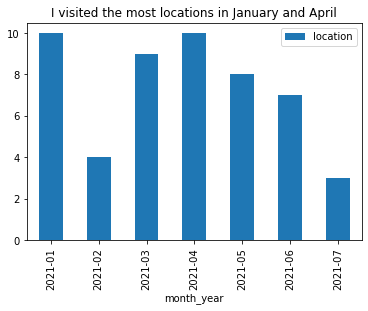

In [10]:
#bar chart of location counts and month_year when visited
import matplotlib.pyplot as plt
loc_dates.plot(x = 'month_year',y=['location'], kind="bar")
plt.title("I visited the most locations in January and April")

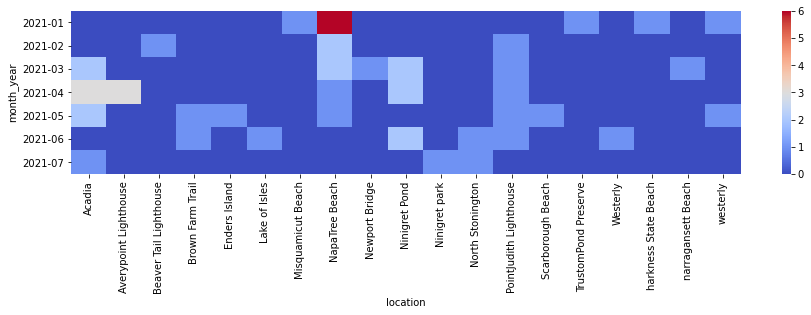

Text(0.5, 1.0, 'I was a busy bee in April and January')

In [11]:
#heat map of locations visited and dates
import seaborn as sns
cont_table = pd.crosstab(index = df['month_year'], columns = df['location'])
cont_table

#plot heat map using cont_table

plt.figure(figsize=(15, 3)) # We can set the size using matplotlib

ax = sns.heatmap(cont_table, cmap = 'coolwarm')
plt.show()

ax.set_xlabel("month_year")
ax.set_ylabel("location")
ax.set_title("I was a busy bee in April and January")

In [12]:
#Most frequented location for taking pictures
#all the locations
df['location'].unique()

array(['westerly', 'NapaTree Beach', 'TrustomPond Preserve',
       'harkness State Beach', 'Misquamicut Beach',
       'Beaver Tail Lighthouse', 'PointJudith Lighthouse', 'Acadia',
       'Ninigret Pond', 'narragansett Beach', 'Newport Bridge',
       'Averypoint Lighthouse', 'Scarborough Beach', 'Enders Island',
       'Brown Farm Trail', 'Lake of Isles', 'Westerly',
       'North Stonington', 'Ninigret park'], dtype=object)

In [13]:
#Find out how many times I went to each location
loc = df.groupby(['location'])['date'].count().reset_index()
loc

,location,date
0,Acadia,8
1,Averypoint Lighthouse,3
2,Beaver Tail Lighthouse,1
3,Brown Farm Trail,2
4,Enders Island,1
5,Lake of Isles,1
6,Misquamicut Beach,1
7,NapaTree Beach,12
8,Newport Bridge,1
9,Ninigret Pond,6


In [14]:
#rename column date ==> number of visits
loc.rename(columns = {'date':'number_of_visits'},inplace = True)
loc

,location,number_of_visits
0,Acadia,8
1,Averypoint Lighthouse,3
2,Beaver Tail Lighthouse,1
3,Brown Farm Trail,2
4,Enders Island,1
5,Lake of Isles,1
6,Misquamicut Beach,1
7,NapaTree Beach,12
8,Newport Bridge,1
9,Ninigret Pond,6


Text(0.5, 1.0, 'Most of my photographs between January and June were taken at NapaTree Beach and Acadia')

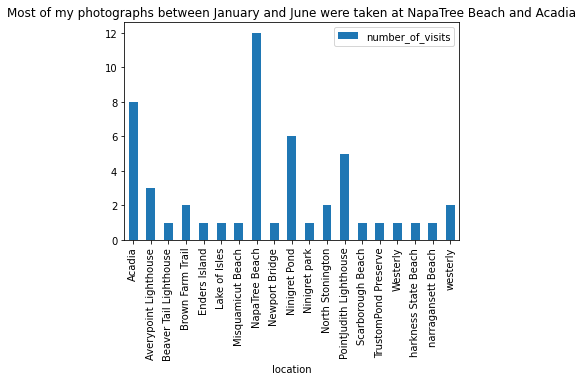

In [15]:
#bar chart of location counts and month_year when visited
import matplotlib.pyplot as plt
loc.plot(x = 'location',y=['number_of_visits'], kind="bar")
plt.title("Most of my photographs between January and June were taken at NapaTree Beach and Acadia")